In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
models = ['baseline', 'rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [45]:
df[features].replace(',','.',regex=True).astype(float).describe()

,%sys,%memused
count,22.000000,22.000000
mean,1.662273,9.623182
std,1.057778,0.516078
min,0.500000,7.670000
25%,1.250000,9.740000
50%,1.260000,9.765000
75%,1.500000,9.825000
max,4.270000,9.890000


In [46]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['mean'], 
                    "sys_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['std'], 
                    "sys_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['max'], 
                    "sys_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['min'],
                    "mem_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['mean'], 
                    "mem_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['std'], 
                    "mem_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['max'], 
                    "mem_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['min']
                  }


In [47]:
df.columns.values

array(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice',
       '%sys', '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice',
       '%idle[...]', 'kbmemfree', 'kbavail', 'kbmemused', '%memused',
       'kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive',
       'kbinact', 'kbdirty', 'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl',
       'kbvmused', 'IFACE', 'rxpck/s', 'txpck/s', 'rxkB/s', 'txkB/s',
       'rxcmp/s', 'txcmp/s', 'rxmcst/s', '%ifutil[...]', 'IFACE.1',
       'rxerr/s', 'txerr/s', 'coll/s', 'rxdrop/s', 'txdrop/s', 'txcarr/s',
       'rxfram/s', 'rxfifo/s', 'txfifo/s[...]', 'call/s', 'retrans/s',
       'read/s', 'write/s', 'access/s', 'getatt/s', 'scall/s',
       'badcall/s', 'packet/s', 'udp/s', 'tcp/s', 'hit/s', 'miss/s',
       'sread/s', 'swrite/s', 'saccess/s', 'sgetatt/s', 'totsck',
       'tcpsck', 'udpsck', 'rawsck', 'ip-frag', 'tcp-tw', 'irec/s',
       'fwddgm/s', 'idel/s', 'orq/s', 'asmrq/s', 'asmok/s', 'fragok/s',
       'fragcrt/s', 'ihd

In [48]:
# features with variance greater than zero
m=df.var()>0
df_filtered = df.loc[:, m.reindex(df.columns, axis=1, fill_value=False)]
df_filtered.columns.values

array(['kbmemfree', 'kbavail', 'kbmemused', 'kbbuffers', 'kbcached',
       'kbcommit', 'kbactive', 'kbinact', 'kbdirty', 'kbanonpg', 'kbslab',
       'kbkstack', 'kbpgtbl', 'kbvmused', 'totsck', 'tcp6sck'],
      dtype=object)

In [49]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [50]:
plt.style.use('plot_style.txt')

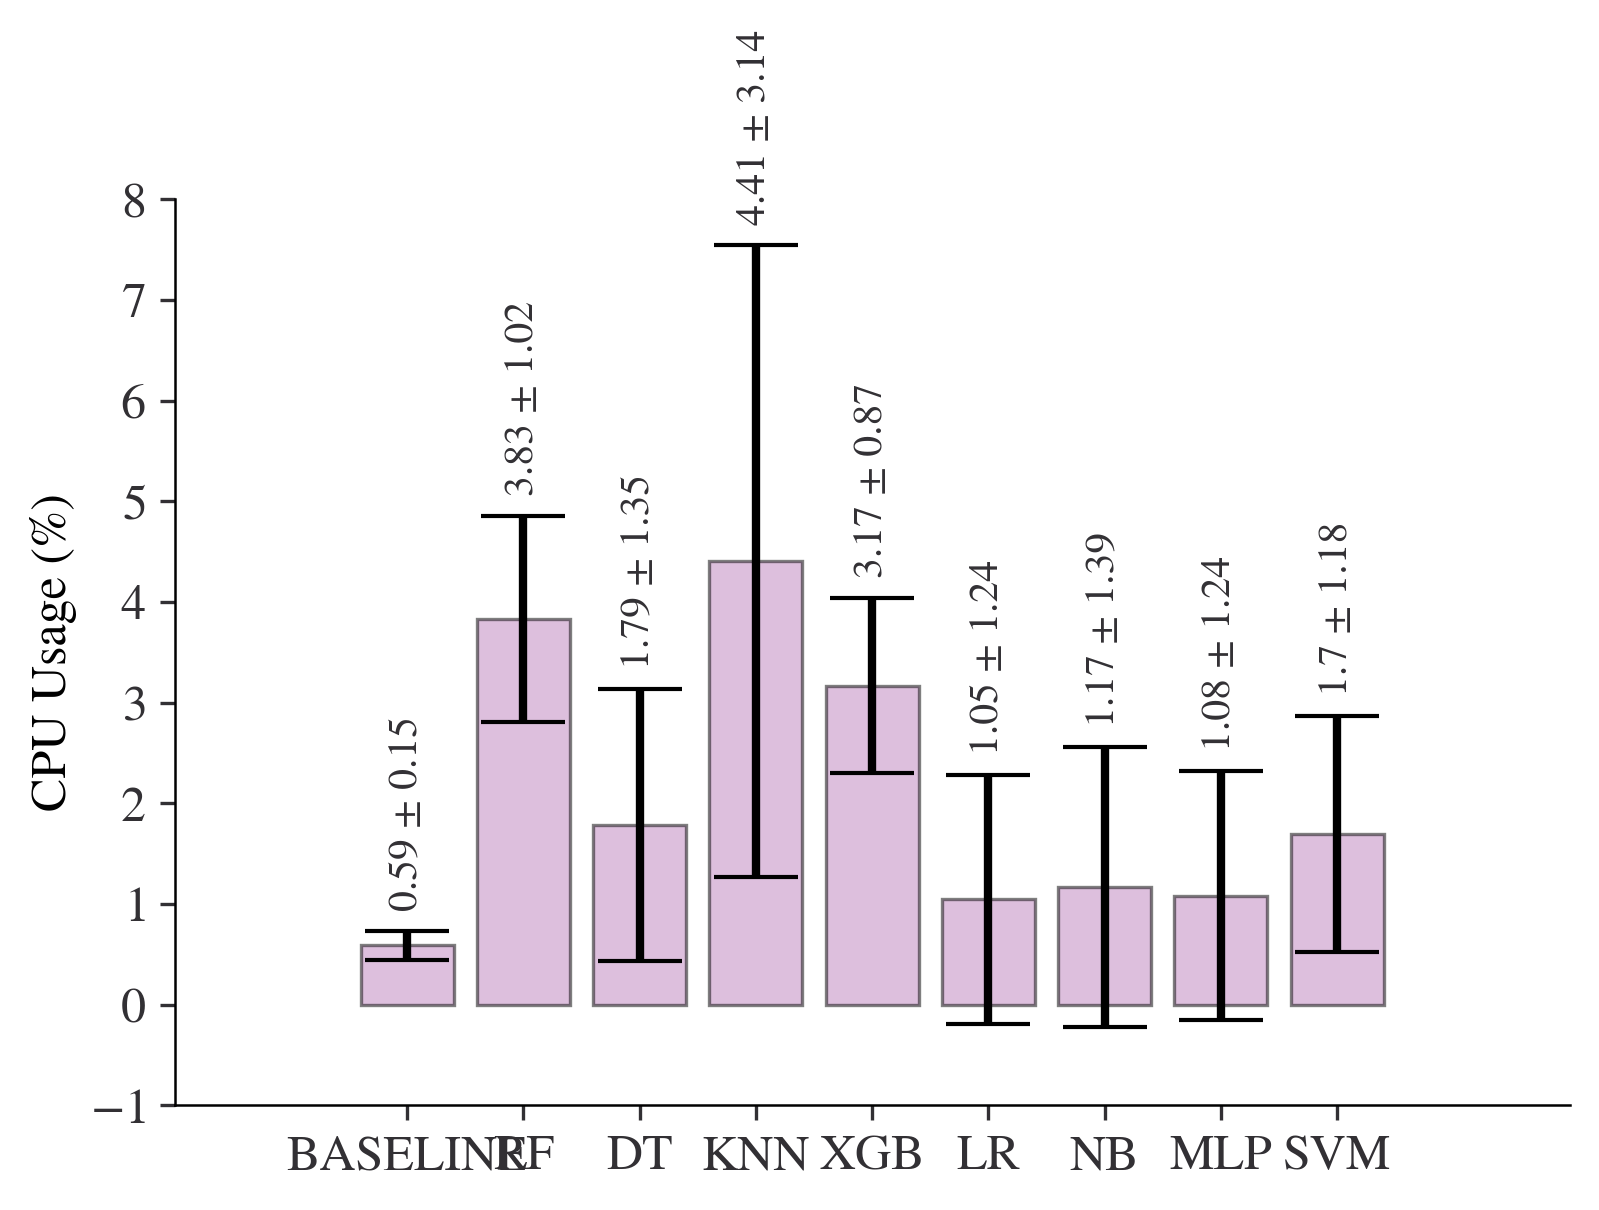

In [51]:
import os
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(sys_mean)):
    plt.text(i, sys_mean[i]+sys_std[i]+0.2, str(round(sys_mean[i],2))+" ± "+str(round(sys_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

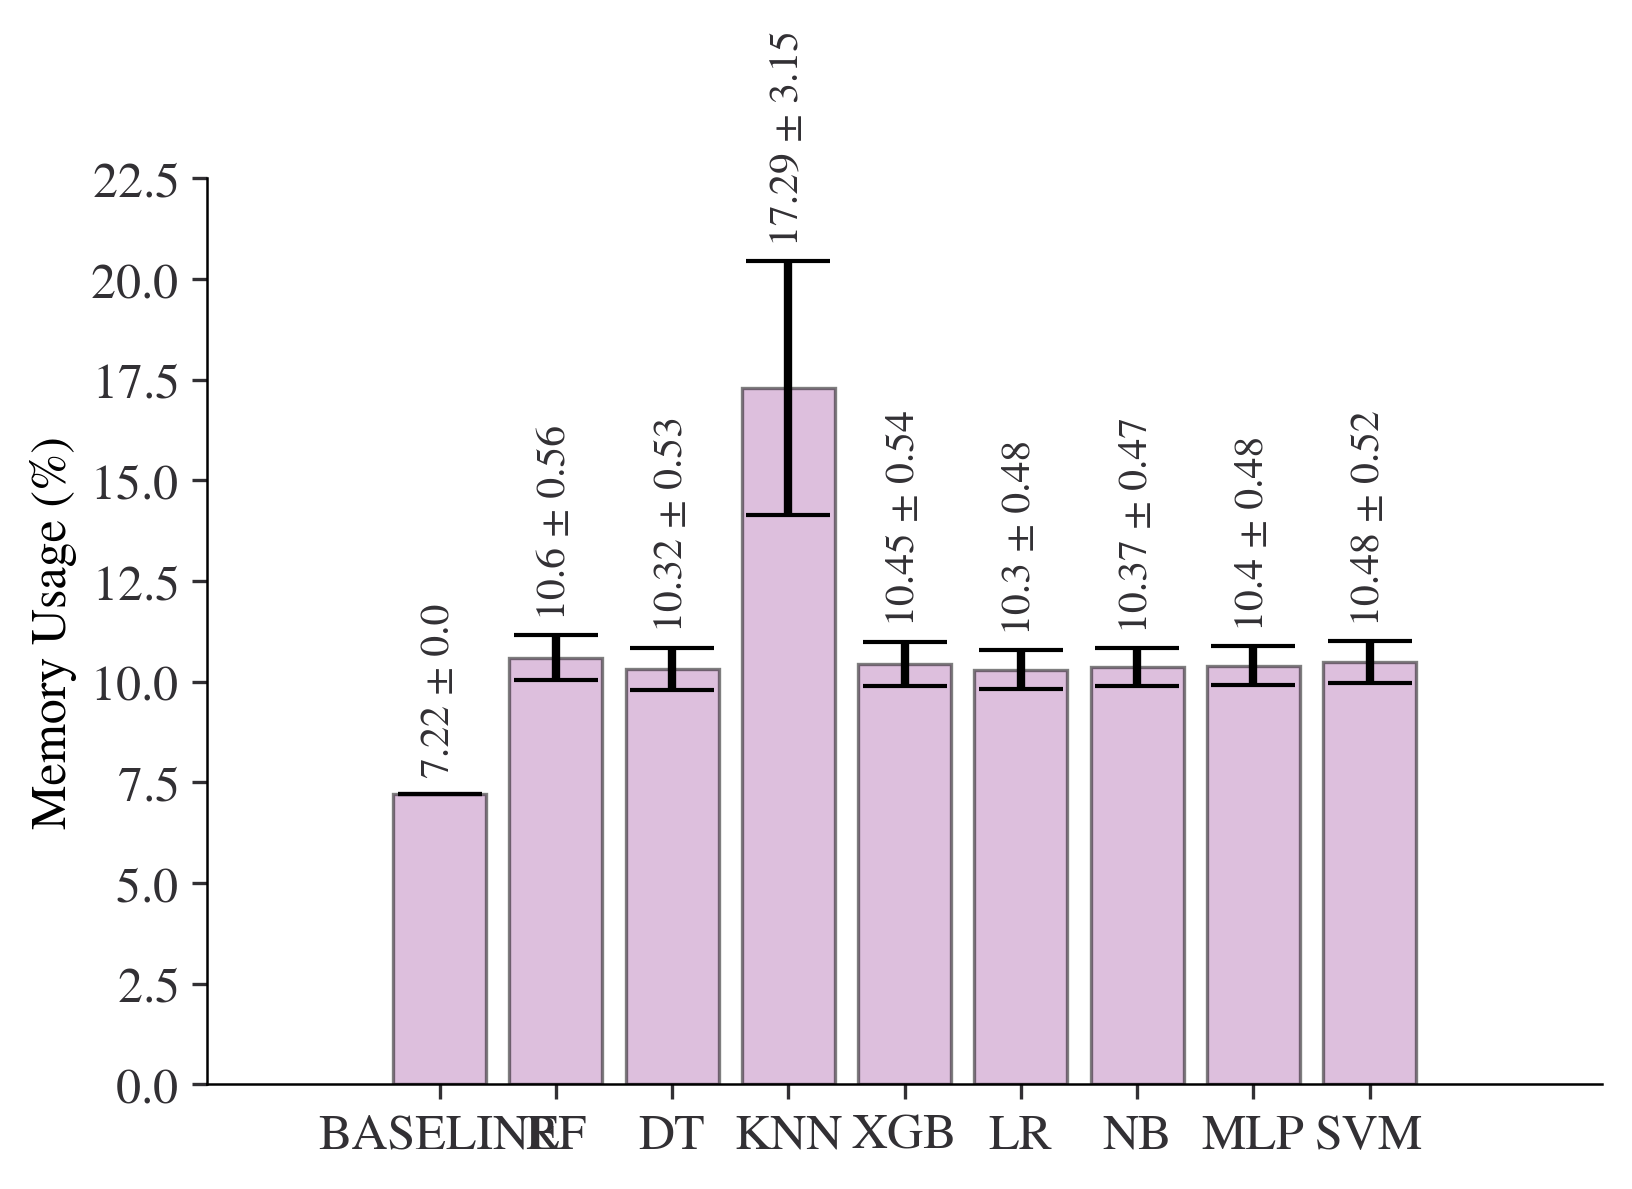

In [52]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(mem_mean)):
    plt.text(i, mem_mean[i]+mem_std[i]+0.4, str(round(mem_mean[i],2))+" ± "+str(round(mem_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---

## Violin and Boxplot

In [64]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys" : df[features]['%sys'].replace(',','.',regex=True).astype(float), 
                    "mem" : df[features]['%memused'].replace(',','.',regex=True).astype(float), 
                  }


In [65]:
data

{'baseline': {'sys': 0     0.25
  1     0.75
  2     0.50
  3     0.75
  4     0.50
  5     0.75
  6     0.50
  7     0.50
  8     0.50
  9     0.75
  10    0.50
  11    0.50
  12    0.75
  13    0.50
  14    0.75
  15    0.50
  16    0.75
  17    0.50
  18    0.75
  19    0.50
  20    0.75
  21    0.50
  Name: %sys, dtype: float64,
  'mem': 0     7.22
  1     7.22
  2     7.22
  3     7.22
  4     7.22
  5     7.22
  6     7.22
  7     7.22
  8     7.22
  9     7.22
  10    7.22
  11    7.22
  12    7.22
  13    7.22
  14    7.22
  15    7.22
  16    7.22
  17    7.22
  18    7.22
  19    7.22
  20    7.22
  21    7.22
  Name: %memused, dtype: float64},
 'rf': {'sys': 0     5.24
  1     4.01
  2     4.00
  3     2.26
  4     0.75
  5     4.02
  6     3.56
  7     3.02
  8     4.07
  9     4.23
  10    3.99
  11    5.06
  12    3.30
  13    2.79
  14    4.53
  15    3.82
  16    4.26
  17    3.77
  18    5.28
  19    3.32
  20    4.27
  21    4.76
  Name: %sys, dtype: float64,
  'mem':

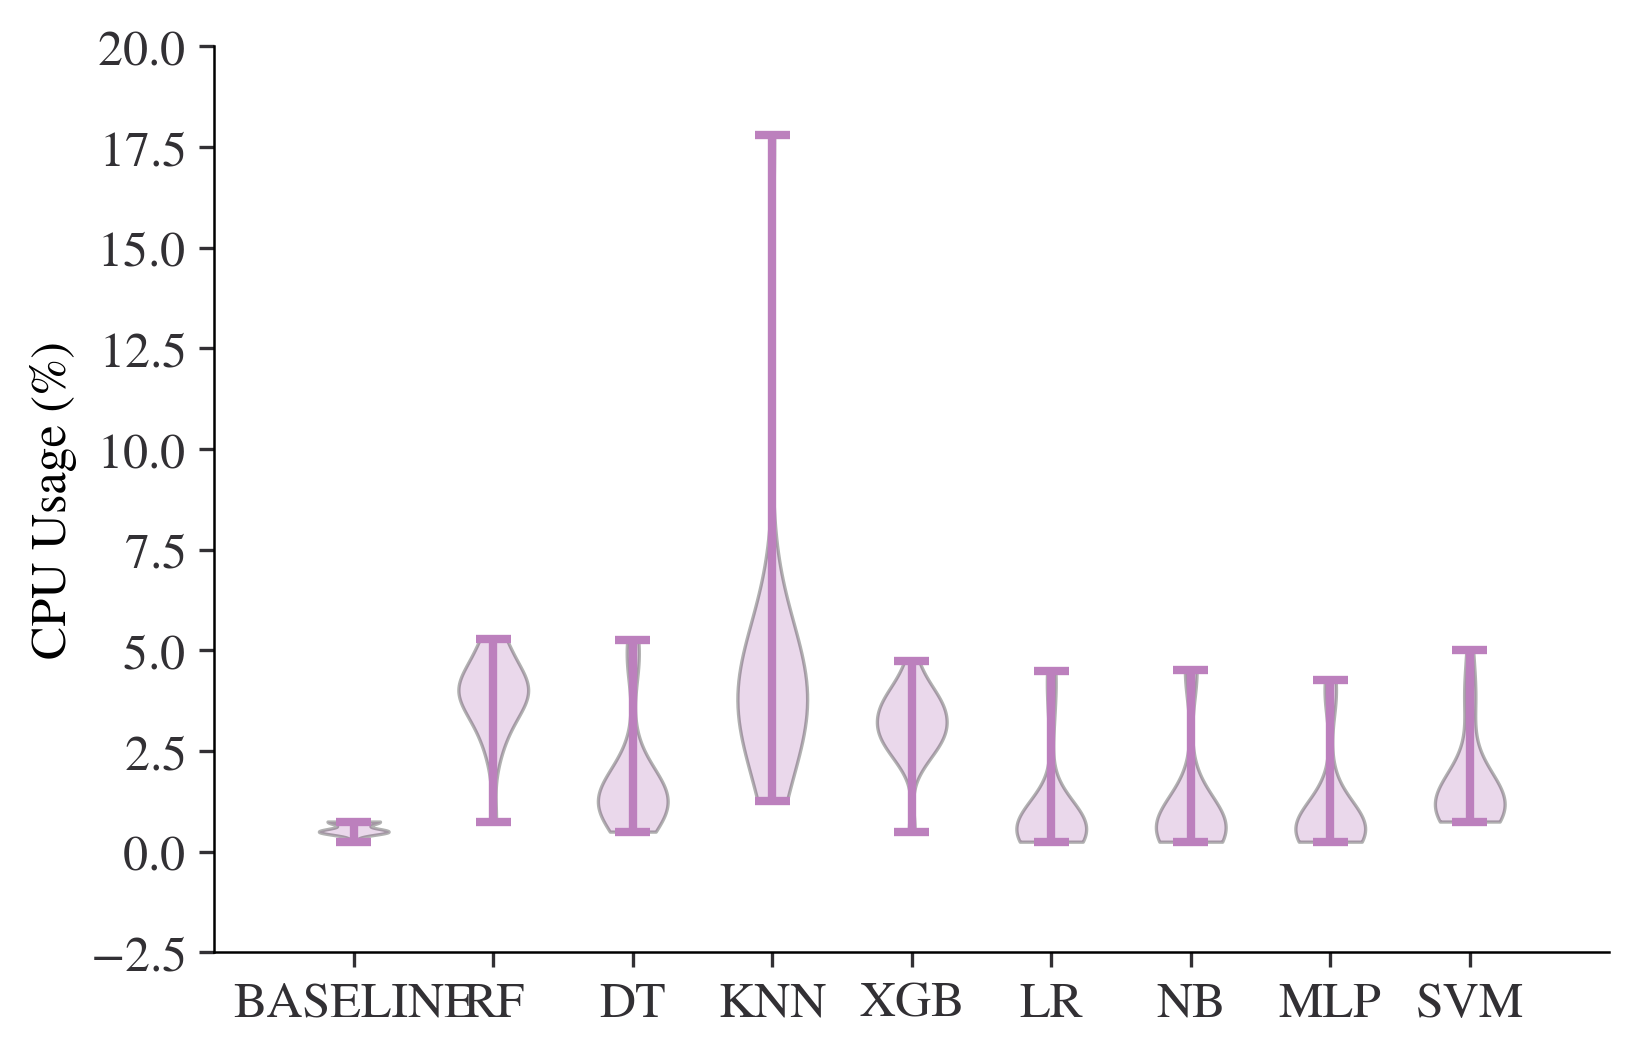

In [66]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.violinplot(plot_sys);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

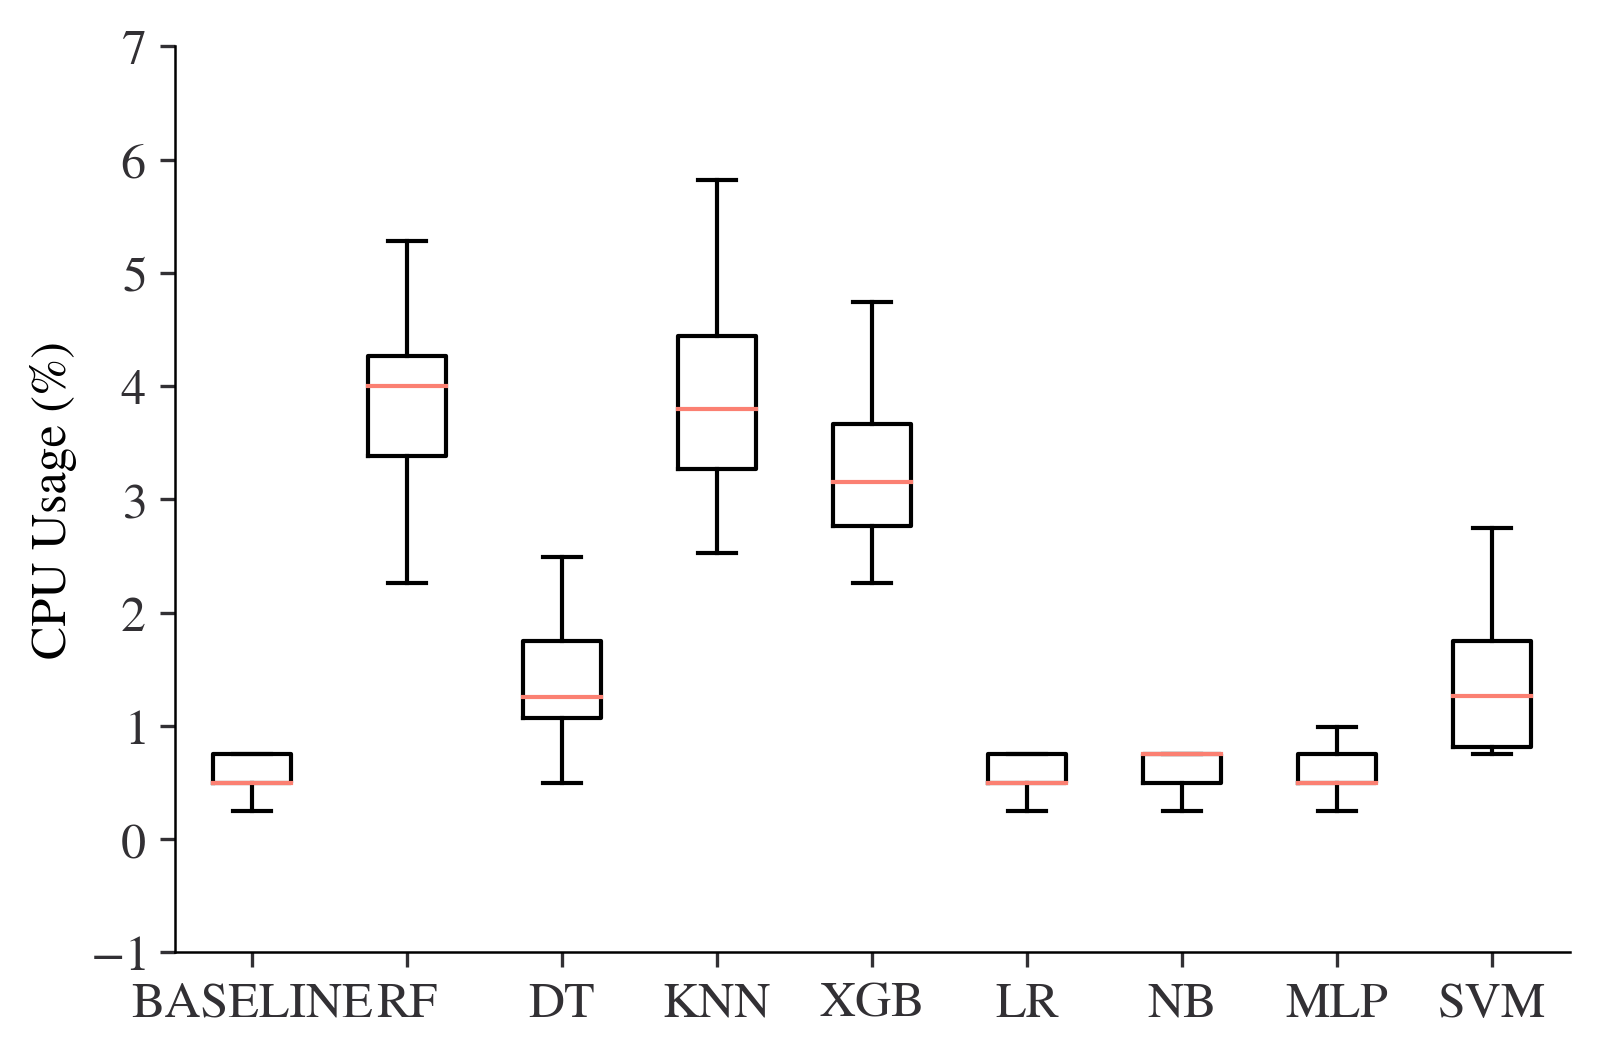

In [67]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.boxplot(plot_sys, showfliers=False);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

In [68]:
[model.upper() for model in models]

['BASELINE', 'RF', 'DT', 'KNN', 'XGB', 'LR', 'NB', 'MLP', 'SVM']

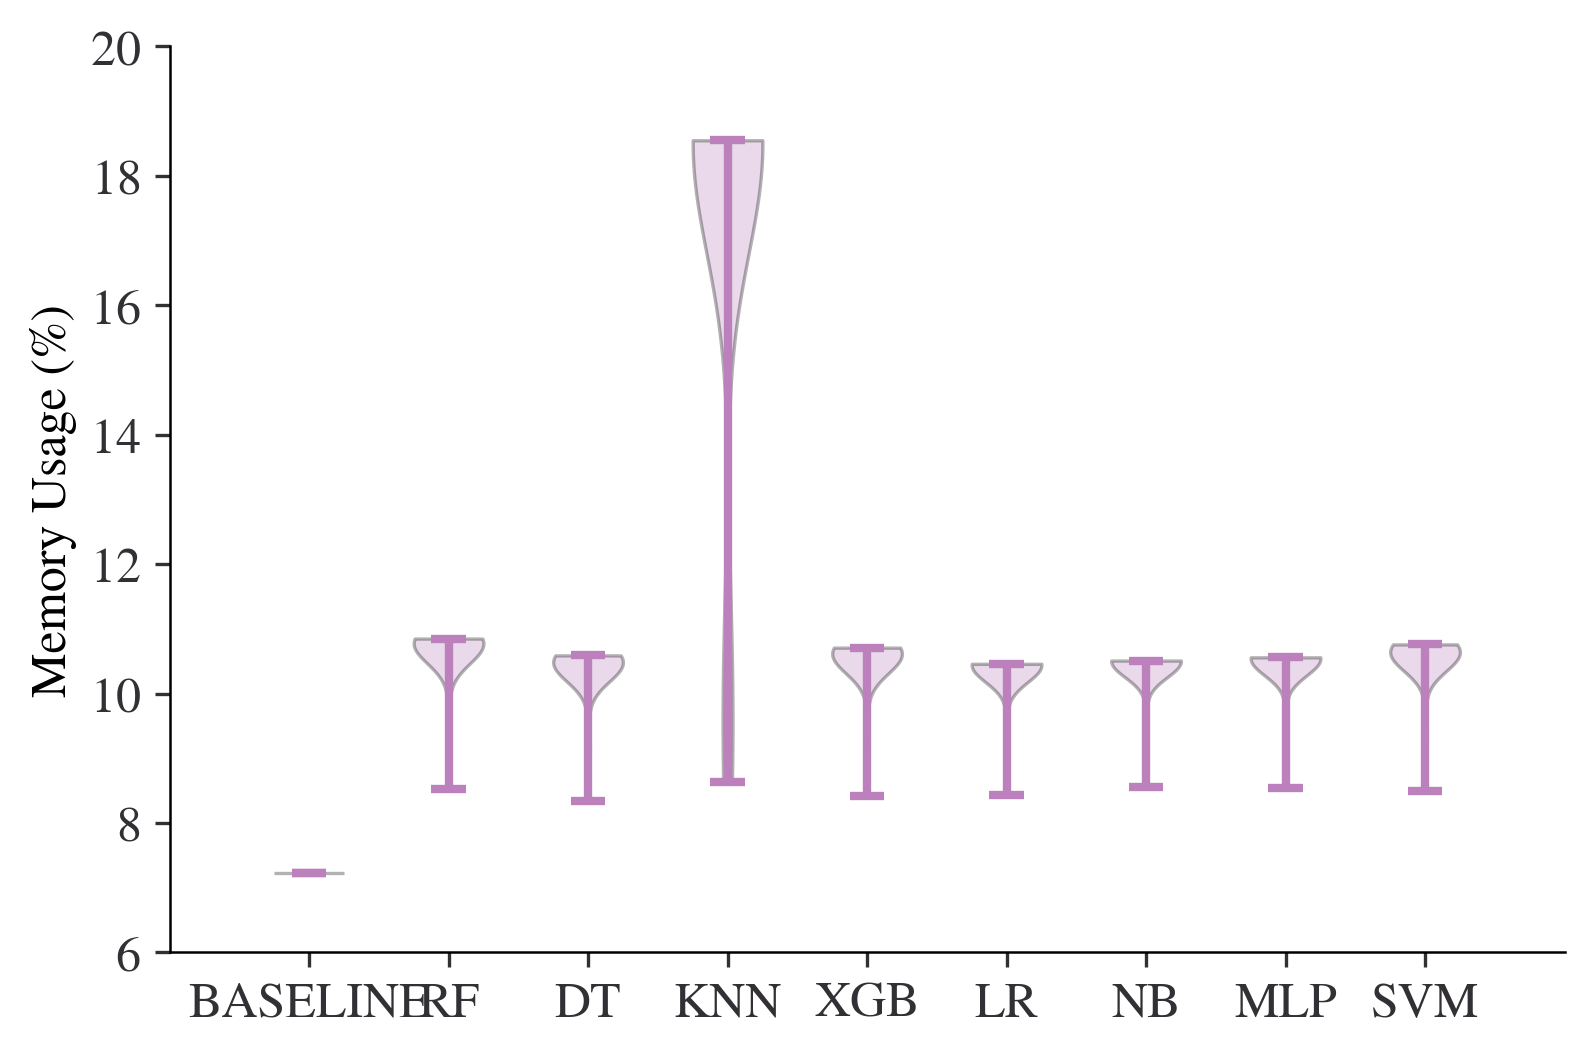

In [69]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.violinplot(plot_mem);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

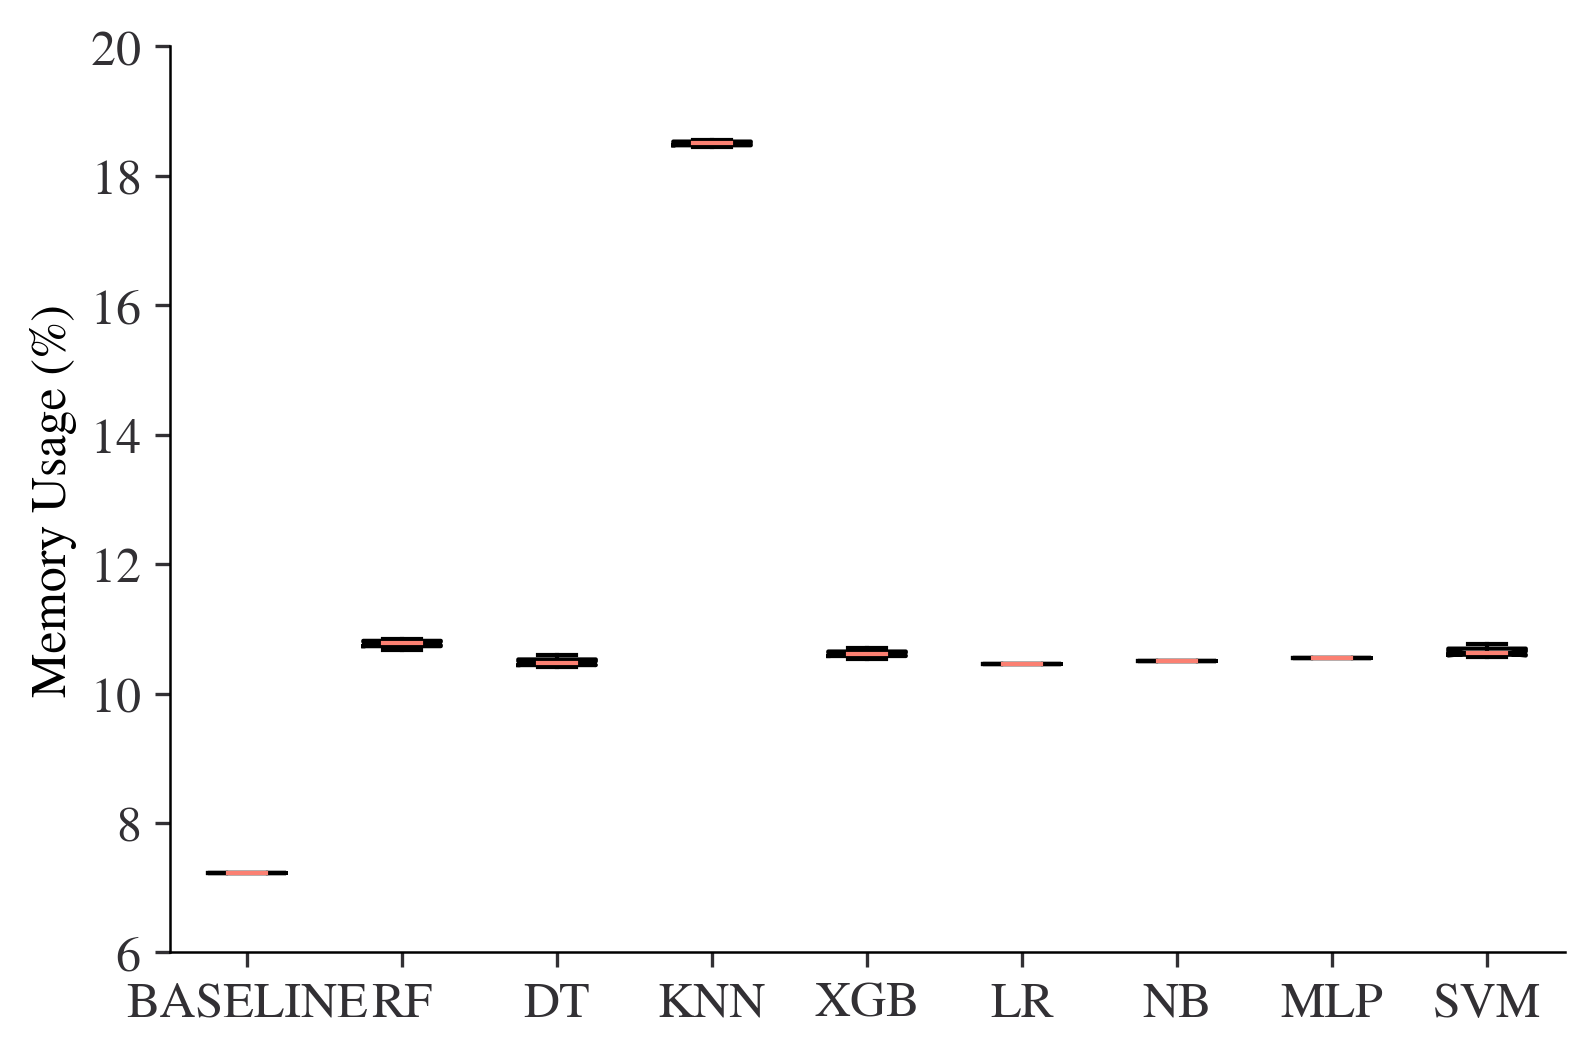

In [70]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.boxplot(plot_mem, showfliers=False, notch=True);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---
## Confidence Interval

In [71]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [72]:
for metric in ['sys', 'mem']:
    for model in models:
        mean, bottom, top = mean_confidence_interval(data[model][metric])
        print(metric, model, mean, bottom, top, (mean>bottom and mean<top))

sys baseline 0.5909090909090909 0.5264991827826256 0.6553189990355562 True
sys rf 3.8322727272727266 3.37862897371477 4.285916480830683 True
sys dt 1.788181818181818 1.1891045736552925 2.3872590627083436 True
sys knn 4.405454545454545 3.0140160594528185 5.796893031456272 True
sys xgb 3.171363636363637 2.7848640573610517 3.557863215366222 True
sys lr 1.045909090909091 0.496550303940963 1.5952678778772187 True
sys nb 1.1718181818181819 0.5561009226825974 1.7875354409537665 True
sys mlp 1.0813636363636363 0.5332063928300225 1.62952087989725 True
sys svm 1.695909090909091 1.1746611843427845 2.2171569974753975 True
mem baseline 7.22 7.22 7.22 False
mem rf 10.602272727272727 10.356194541375338 10.848350913170115 True
mem dt 10.318636363636365 10.082805328007497 10.554467399265233 True
mem knn 17.288636363636368 15.891177219593276 18.68609550767946 True
mem xgb 10.447272727272725 10.20574347728068 10.68880197726477 True
mem lr 10.296818181818178 10.081904192592043 10.511732171044313 True
mem 

---
# Violin plots + Boxplot

In [73]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals.iloc[-1]) # replaced [-1] by iloc[-1] for being Pandas Series

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

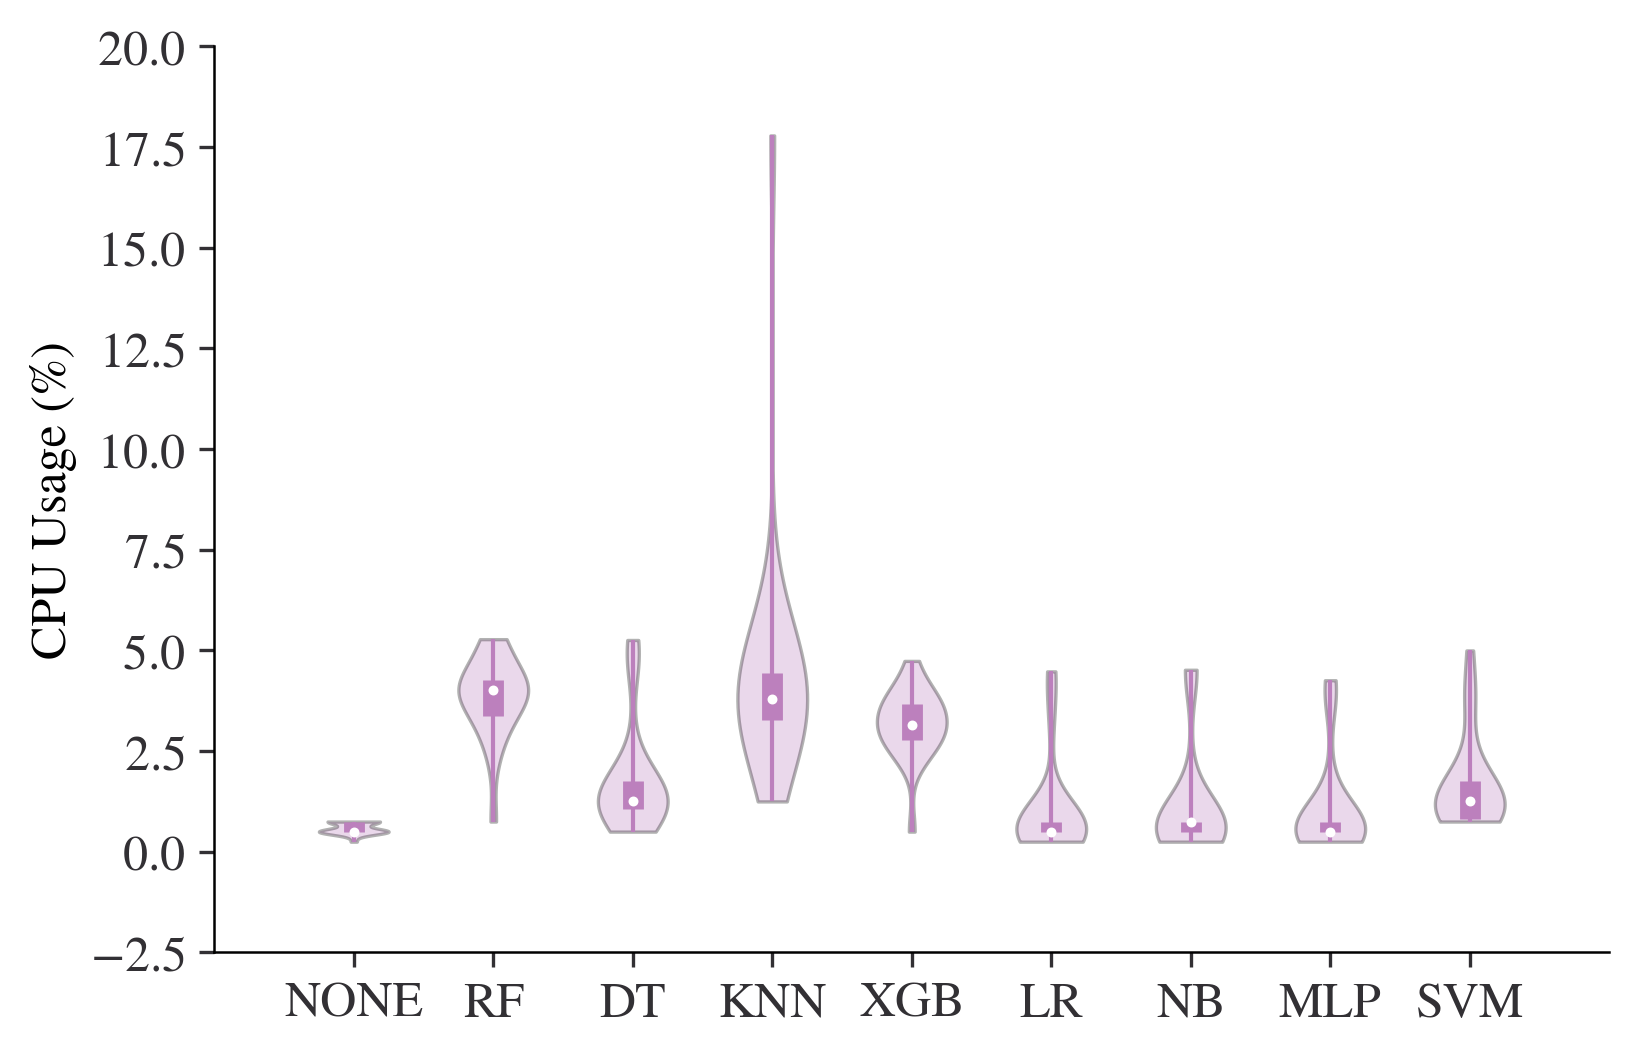

In [83]:
import numpy as np

plot_sys = []

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')

parts = ax.violinplot(
        plot_sys, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_sys, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_sys, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_sys]
whiskers_max = [i.max() for i in plot_sys]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

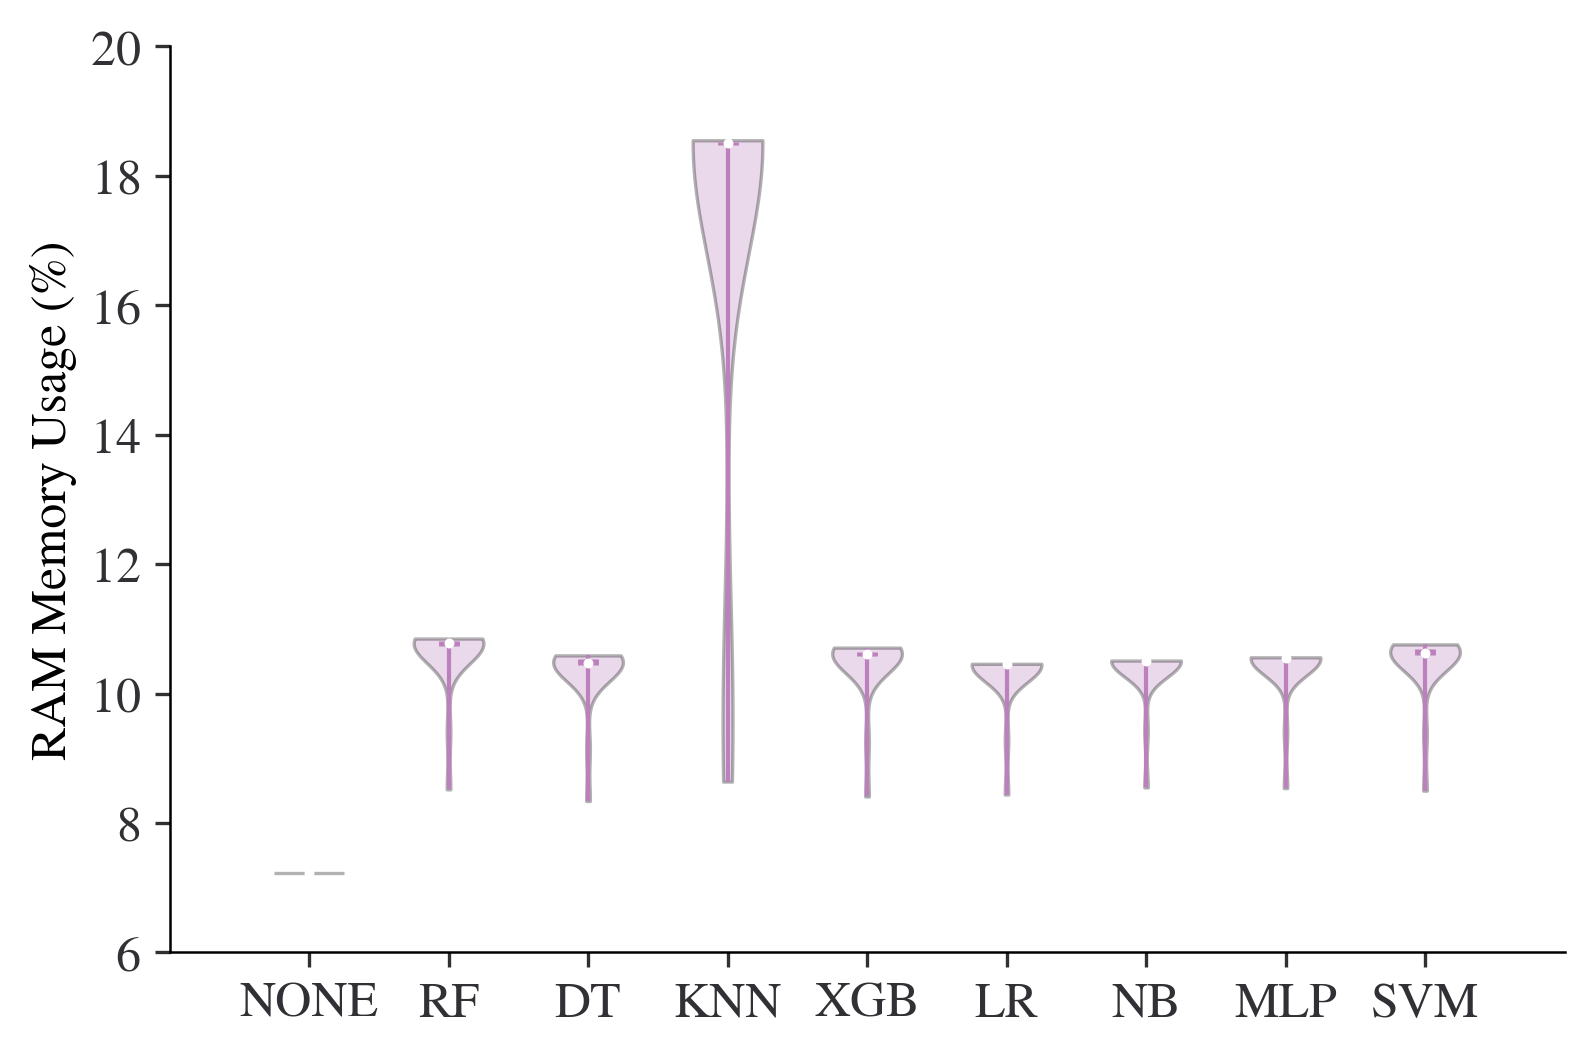

In [85]:
import numpy as np

plot_mem = []

for i, model in enumerate(models):
    if model == "none":
        models[i] = "baseline"

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('RAM Memory Usage (%)')

parts = ax.violinplot(
        plot_mem, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_mem, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_mem, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_mem]
whiskers_max = [i.max() for i in plot_mem]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()